# Fundementals of Machine Learning

Modern AI are fundamentally machine learning systems. Therefore, a prerequisite for studying Responsible AI problems is a basic understanding of machine learning. Before we dive into specific Responsible AI topics, we would like to provide a sufficient exposition of machine learning, focusing on _predictive_ machine learning.

The overall objective of a predictive machine learning is to predict certain _target_ of interest based on input _features_. This is achieved by _training_ certain machine learning algorithm on examples of target and features (called _labeled data_). The training process creates a _model_, which can then be used to generate predictions given new input features without target (called _unlabeled data_).

There are two prevalent types of predictive machine learning task:
- Classification: predicting a categorical target based on input features.
- Numeric Prediction (a.k.a Regression): predicting a numerical / continuous target based on input features.

Many popular machine learning algorithms can accommodate both tasks (albeit with slight procedural differences). This chapter will not cover the details of these machine learning algorithms; instead, we will focus on demonstrating the pipeline of _model building and evaluation_, as they are more relevant prerequisites for the subsequent Responsible AI topics.

## Classification

To demonstrate the process of building and evaluating a classification model, let's walk through the example of cancer detection with the ```Wisconsin Breast Cancer``` dataset.

```{admonition} Data: Wisconsin Breast Cancer
:class: note
- Location: "data/breast_cancer.csv"
- Shape: (683, 10)
- Note: This is a public dataset commonly used for demonstrating binary classification (records with missing values have been removed for simplicity). The goal is to predict cancer status (4 = malignant; 2 = benign) based on cell features.
```

In [3]:
# load the data
import pandas as pd
cancer = pd.read_csv('../data/breast_cancer.csv')
cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,9,1,2,6,4,10,7,7,2,4
1,10,4,7,2,2,8,6,1,1,4
2,6,10,10,10,8,10,7,10,7,4
3,1,1,1,1,2,5,5,1,1,2
4,7,6,10,5,3,10,9,10,2,4


The first step of building a predictive machine learning model is tyically data partitioning, where we randomly split the labeled data into at least a training set (for training the model) and a testing set (for evalauting the model's performance on data that are unseen during training).

In [5]:
from sklearn.model_selection import train_test_split
X = cancer.drop(columns=['Class'])
y = cancer['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we need to feed the training data (i.e., ```X_train``` as features and ```y_train``` as target) to a machine learning algorithm. Here, we pick random forest for illustration.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
_ = model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

With a trained model, we can now deploy it to make predictions on the testing data. Then, by comparing the model's predictions with the actual labels, we can get quantitative measurements of how good the model is at predicting cancer.

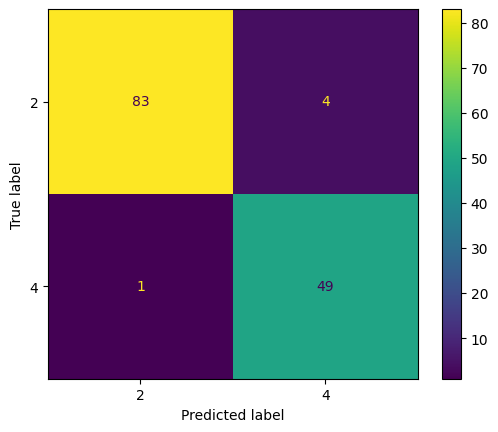

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(X_test)
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

The above figure visualizes what's known as a _confusion matrix_, which is essentially a tabulation of true labels vs. predicted labels on the testing data. In this dataset, the target variable has two possible values -- called two _classes_ -- namely malignant (4) and benign (2). That's why the confusion matrix is 2 by 2. We can see that the model correctly predicted 83 benign cases, 49 malignant cases. Meanwhile, there are 4 benign cases that the model mislclassified as malignant, and 1 malignant case that the model mislcassified as benign.

In addition, there are several commonly used _performance metrics_ that one can compute based on the confusion matrix, including:
- **Accuracy**: proportion of correct predictions across all classes.
- **Precision**: proportion of correct predictions among all instances that the model predicts to be in a certain class.
- **Recall**: proportion of correct predictions among all instances that actually belong to a certain class.

Both precision and recall are _class-specific metrics_, meaning that you can compute a precision / recall score for each individual target class.

```{admonition} Formal Definitions of Classification Performance Metrics
:class: tip
Let $Y$ denote the actual label and $\widehat{Y}$ denote a model's prediction. Suppose the two target classes are respectively class 1 and class 0. Then the three performance metrics can be formally defined as:

\begin{align*}
\text{Accuracy} \quad  & \Pr(Y = \widehat{Y}) \\
\text{Precision (Class 1)} \quad  & \Pr(Y = 1 | \widehat{Y} = 1) \\
\text{Recall (Class 1)} \quad  & \Pr(\widehat{Y} = 1 | Y = 1) \\
\end{align*}
```

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        87
           4       0.92      0.98      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



On the testing data, our random forest classifier achieves
- An overall accuracy of 96\%, meaning that 96\% of the model's predictions on the testing set turn out to be correct.
- A precision of 92\% for the malignant class, meaning that among the cases predicted as malignant, 92\% of them turn out to be correct.
- A recall of 98\% for the malignant class, meaning that among all malignant cases, the model correctly predicts 98\% of them.


Finally, when new (unlabeled) data arrives, we can use the trained classifier to make predictions. This is the entire basic process of building and evaluating a classification model.

## Numeric Prediction

Building a numeric prediction model follows pretty much the same process as building a classification model except that the prediction target is a continuous variable and, because of that, the common evaluation metrics are different.

We will demonstrate this using the ```diabetes``` dataset.

```{admonition} Data: Wisconsin Breast Cancer
:class: note
- Location: "data/diabetes.csv"
- Shape: (442, 10)
- Note: This is a public dataset commonly used for demonstrating numeric prediction. The goal is to predict diabetes score (under the "target" column) based on the other 9 features.
```

In [16]:
# load the data
diabetes = pd.read_csv('../data/diabetes.csv')
diabetes.head()

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Same as before, we will partition the data, train the model, then deploy it to make predictions on the testing data.

In [17]:
# data partitioning
X = diabetes.drop(columns=['target'])
y = diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)


Given numeric target values, we cannot use the same confusion matrix concept for model evaluation. In numeric prediction, model performance is evaluated based on _how much the predicted value deviates from the actual target value_ (known as prediction error). Different performance metrics are essentially different ways to aggregate the prediction errors on testing data.

Some common performance metrics include Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE).

```{admonition} Formal Definitions of Numeric Prediction Performance Metrics
:class: tip
Let $Y_i$ and $\widehat{Y}_i$ respectively denote the actual and predicted target value for testing instance $i$ (among a total of $N$ instances). Then the three numeric prediction performance metrics can be formally defined as:

\begin{align*}
\text{RMSE} \quad  & \sqrt{ \frac{1}{N} \sum_{i=1}^N \left( Y_i - \widehat{Y}_i \right)^2 } \\
\text{MAE} \quad  & \frac{1}{N} \sum_{i=1}^N \left| Y_i - \widehat{Y}_i \right| \\
\text{MAPE} \quad  & \frac{1}{N} \sum_{i=1}^N \left| \frac{Y_i - \widehat{Y}_i}{Y_i} \right|
\end{align*}
```

In [18]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'RMSE: {rmse}, MAE: {mae}, MAPE: {mape}')

RMSE: 54.332408273184846, MAE: 44.053033707865175, MAPE: 0.4000528510559908


These results mean that, on average, the model's prediction deviate from true diabetes score by about 44-54 points (depending on which metric you use) or 40\% (based on MAPE).